<a href="https://colab.research.google.com/github/komzy/Beethoven-Piano-Music-Creator/blob/master/week1/Spark_with_ML_Week_1_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Part A: Homework/Assignment
Data : https://opendata.com.pk/dataset/corona-virus-pakistan-dataset-2020

Download the Covid19 dataset for Pakistan and save in your Google Drive (preferably)

* Load the data with Spark
* Save the copy in `Parquet` and `ORC` format
* Clean/transform the data if needed.


### Answer Below Questions

1. Plot the cummulative Suspected Cases/Tests/Admitted/Deaths/Recovered/
2. Group by cases based on States and other columns
3. Find the mean and median cases per day across Pakistan and different states Plot them for better visualization. 
4. Perform other analysis as you may think contribute in your learning

> All these exercises must be done using Spark operations and submitted in Google colab notebook format through LMS. 

**Due Date: 20:00 hrs 12/04/2021** 



In [3]:
#!pip install plotly==4.14.3

     |████████████████████████████████| 13.2MB 253kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [1]:
import plotly  #needs to be v4.14.3 , run above cell if not
plotly.__version__

'4.14.3'

In [2]:
# Run below commands
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://apache.osuosl.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
!pip install -q findspark
!ls spark-3.1.1-bin-hadoop3.2/bin

beeline		      pyspark		spark-class.cmd   spark-sql
beeline.cmd	      pyspark2.cmd	sparkR		  spark-sql2.cmd
docker-image-tool.sh  pyspark.cmd	sparkR2.cmd	  spark-sql.cmd
find-spark-home       run-example	sparkR.cmd	  spark-submit
find-spark-home.cmd   run-example.cmd	spark-shell	  spark-submit2.cmd
load-spark-env.cmd    spark-class	spark-shell2.cmd  spark-submit.cmd
load-spark-env.sh     spark-class2.cmd	spark-shell.cmd


In [3]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

In [4]:
import findspark
findspark.init()

import pyspark
from pyspark.sql import SparkSession

spark = SparkSession \
        .builder \
        .master("local[*]")\
        .appName('week1_assignment') \
        .getOrCreate()
# Test the spark 
spark
# Check the pyspark version
print(pyspark.__version__)

3.1.1


In [73]:
from datetime import datetime, date
import pandas as pd
from pyspark.sql import Row
from pyspark.sql.functions import col


In [7]:
#Load Data with Spark and convert to spark.DataFrames
pandas_df = pd.read_excel('covid_final_data.xlsx')
#Data Cleaning
pandas_df["Date"]= pd.to_datetime(pandas_df.Date)
n= "Tests  performed in last 24 hours"    
input = pandas_df[n]
output = []
for letter in input :
        try :
            int(letter)
            output.append(letter)

        except ValueError :
                output.append(0)
                pass

pandas_df[n] = output
#pandas_df.head(52)

spark_df = spark.createDataFrame(pandas_df)
#spark_df.show(52,False)


In [8]:
#write/read in ORC
spark_df.write.orc('covid_final_data.orc')
!ls
spark.read.orc('covid_final_data.orc').show()

covid_final_data.orc   sample_data		  spark-3.1.1-bin-hadoop3.2.tgz
covid_final_data.xlsx  spark-3.1.1-bin-hadoop3.2


In [9]:
# Convert Spark DataFrame to Pandas. 
# df_pandas = spark_df.toPandas()  
# df_pandas.plot(x ='Date', y='Cumulative', kind = 'scatter')


[Text(0, 0.5, 'Avg Cumulative Cases Per Day'), Text(0.5, 0, 'Date')]

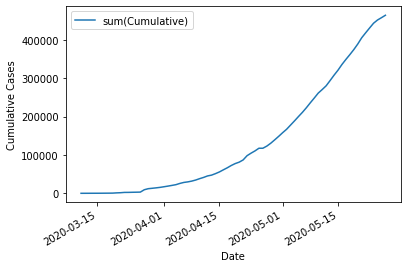

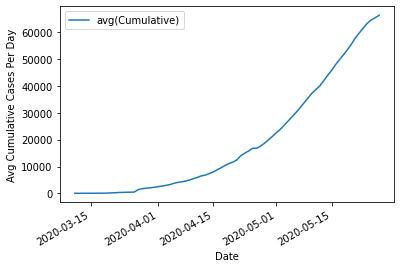

In [138]:
#Plot cumulative for all of Pakistan
date_sum_sdf=spark_df.groupby('Date').sum()
#date_sum_sdf.sort(col("Date").asc()).show(truncate=False)
date_sum_pdf=date_sum_sdf.toPandas()
date_sum_pdf.plot(x ='Date', y='sum(Cumulative)', kind = 'line').set(xlabel="Date", ylabel="Cumulative Cases")

# Plot mean of cumulative cases per day for all of Pakistan
date_mean_sdf=spark_df.groupby('Date').mean()
#date_mean_sdf.sort(col("Date").asc()).show(truncate=False)
date_mean_pdf=date_mean_sdf.toPandas()
date_mean_pdf.plot(x ='Date', y='avg(Cumulative)', kind = 'line').set(xlabel="Date", ylabel="Avg Cumulative Cases Per Day")

[Text(0, 0.5, 'Cumulative Cases Per State'), Text(0.5, 0, 'Date')]

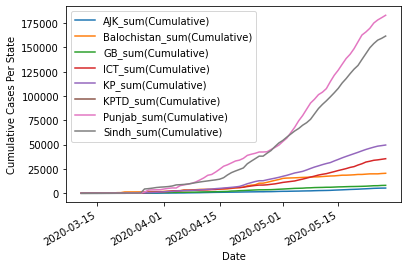

In [139]:
#Plot cases per day for States
states_sum_sdf=spark_df.groupBy("Date").pivot("Region").sum()
#states_sum_sdf.sort(col("Date").asc()).show(100,truncate=False)
states_sum_pdf = states_sum_sdf.toPandas()
states_sum_pdf.plot(x ='Date', y=["AJK_sum(Cumulative)",
                                   "Balochistan_sum(Cumulative)",
                                   "GB_sum(Cumulative)",
                                   "ICT_sum(Cumulative)",
                                   "KP_sum(Cumulative)",
                                   "KPTD_sum(Cumulative)",
                                   #"Mobile Lab_avg(Cumulative)",
                                   "Punjab_sum(Cumulative)",
                                   "Sindh_sum(Cumulative)"
                                   ], kind = 'line').set(xlabel="Date", ylabel="Cumulative Cases Per State")



In [90]:
#Get mean, median, etc per State
states_summary_sdf=states_sum_sdf.summary()
states_summary_sdf.show()

+-------+-------------------+-------------------+----------------------------------+------------------------------------+-------------------+------------------+------------------------+---------------------------+-----------------------+------------------------------------------+---------------------------+---------------------------+------------------------------------------+--------------------------------------------+---------------------------+------------------------+--------------------------------+-----------------------------------+-------------------------------+--------------------------------------------------+------------------+------------------+---------------------------------+-----------------------------------+------------------+------------------+-----------------------+--------------------------+----------------------+-----------------------------------------+-------------------+-------------------+----------------------------------+----------------------------------

+-------------------+---------------------------+------------------+-------------------+------------------+--------------------+----------------------+---------------------+
|AJK_sum(Cumulative)|Balochistan_sum(Cumulative)|GB_sum(Cumulative)|ICT_sum(Cumulative)|KP_sum(Cumulative)|KPTD_sum(Cumulative)|Punjab_sum(Cumulative)|Sindh_sum(Cumulative)|
+-------------------+---------------------------+------------------+-------------------+------------------+--------------------+----------------------+---------------------+
|                 77|                         77|                77|                 77|                77|                  12|                    77|                   77|
| 1600.6753246753246|          8638.727272727272| 3099.038961038961| 10012.077922077922|14361.298701298701|   8.583333333333334|      51929.4025974026|     45182.2987012987|
|  1602.456990485798|          7474.704846551614| 2677.641064353976| 10882.313940719347| 15973.81821595719|   7.191640770345594|  

[Text(0, 0.5, 'Mean Cumulative Cases Per Day'), Text(0.5, 0, 'States')]

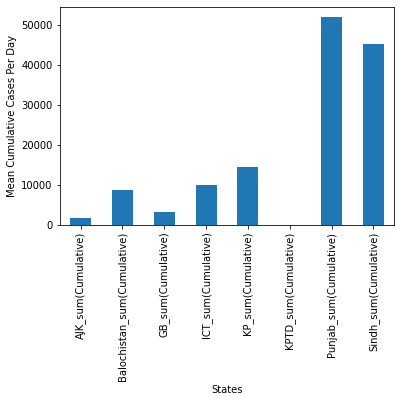

In [177]:
coloumns_cumulative= ["AJK_sum(Cumulative)",
                      "Balochistan_sum(Cumulative)",
                      "GB_sum(Cumulative)",
                      "ICT_sum(Cumulative)",
                      "KP_sum(Cumulative)",
                      "KPTD_sum(Cumulative)",
                      #"Mobile Lab_avg(Cumulative)",
                      "Punjab_sum(Cumulative)",
                      "Sindh_sum(Cumulative)"]
states_cumulative_summary= states_summary_sdf.select(coloumns_cumulative)
states_cumulative_summary.show()
mean = states_cumulative_summary.toPandas().iloc[1]
mean.astype(float).plot(kind='bar').set(xlabel="States", ylabel="Mean Cumulative Cases Per Day")

[Text(0, 0.5, 'Median(50%) Cases Per Day'), Text(0.5, 0, 'States')]

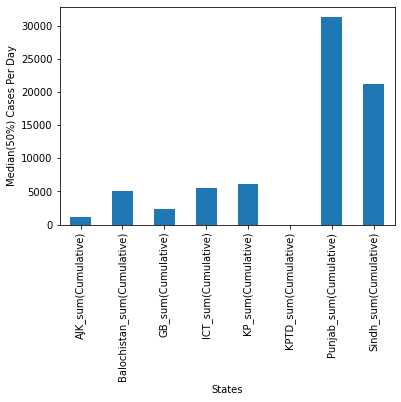

In [176]:
median = states_cumulative_summary.toPandas().iloc[5]
median.astype(float).plot(kind='bar').set(xlabel="States", ylabel="Median(50%) Cases Per Day")

## Part B: Homework/Assignment
Data : https://opendata.com.pk/dataset/corona-virus-pakistan-dataset-2020

Download the Covid19 dataset for Pakistan and save in your Google Drive (preferably)

* Load the data with Spark
* Save the copy in `Parquet` and `ORC` format
* Clean/transform the data if needed.


### Answer Below Questions

1. Plot the cummulative Suspected Cases/Tests/Admitted/Deaths/Recovered/
2. Group by cases based on States and other columns
3. Find the mean and median cases per day across Pakistan and different states Plot them for better visualization. 
4. Perform other analysis as you may think contribute in your learning

> All these exercises must be done using KOALAS library and submitted in Google colab notebook format through LMS. 

**Due Date: 20:00 hrs 12/04/2021** 

In [12]:
! pip install koalas

     |████████████████████████████████| 1.4MB 4.3MB/s 


In [13]:
import pandas as pd
import numpy as np
import databricks.koalas as ks
pd.__version__
np.__version__
ks.__version__

'1.7.0'

In [149]:
# Covert pandas data frame in koalas
koalas_df = ks.from_pandas(pandas_df)
#koalas_df.head()

# Plot cumulative for all of Pakistan
date_sum_kdf=koalas_df.groupby('Date').sum().sort_index()
#date_sum_kdf.head()
date_sum_kdf.plot.line(y='Cumulative',labels=dict(Cumulative="Cumulative Cases"))

In [151]:
#Plot cumulative cases per day for all of Pakistan
date_mean_kdf=koalas_df.groupby('Date').mean().sort_index()
date_mean_kdf.plot.line(y='Cumulative', labels=dict(Cumulative="Mean of Cumulative Cases Per Day"))

In [152]:
#Plot cases per day for states
states_kdf=koalas_df.pivot(index='Date', columns='Region',values='Cumulative').sort_index()
states_kdf.plot.line(labels=dict(value="Cumulative Cases"))


In [122]:
#Get mean, median, etc per State
states_summary_kdf=states_kdf.describe()
states_summary_kdf


,AJK,Balochistan,GB,ICT,KP,KPTD,Mobile Lab,Punjab,Sindh
count,77.000000,77.000000,77.000000,77.000000,77.000000,12.000000,1.0,77.000000,77.000000
mean,1600.675325,8638.727273,3099.038961,10012.077922,14361.298701,8.583333,0.0,51929.402597,45182.298701
std,1602.456990,7474.704847,2677.641064,10882.313941,15973.818216,7.191641,NaN,58219.350361,50544.247363
min,3.000000,19.000000,10.000000,48.000000,20.000000,3.000000,0.0,61.000000,84.000000
25%,105.000000,1695.000000,862.000000,1200.000000,1022.000000,4.000000,0.0,3616.000000,5945.000000
50%,1175.000000,5025.000000,2313.000000,5479.000000,6140.000000,5.000000,0.0,31245.000000,21272.000000
75%,2518.000000,16705.000000,5658.000000,16666.000000,25522.000000,7.000000,0.0,92781.000000,76078.000000
max,5379.000000,20574.000000,8175.000000,35551.000000,49627.000000,21.000000,0.0,182977.000000,161628.000000


Text(0, 0.5, 'Mean Cumulative Cases Per Day')

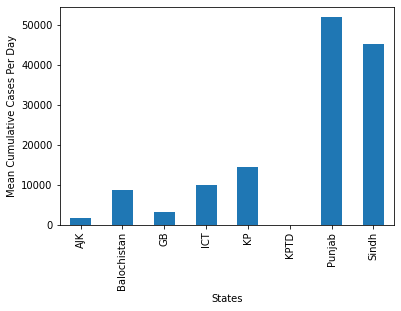

In [175]:
columns_cumulative= ["AJK",
                      "Balochistan",
                      "GB",
                      "ICT",
                      "KP",
                      "KPTD",
                      #"Mobile Lab",
                      "Punjab",
                      "Sindh"]
states_cumulative_summarykdf= states_summary_kdf.loc[['mean','50%'], columns_cumulative] 
mean=states_cumulative_summarykdf.loc['mean'].plot.bar()
mean.axes.set_xlabel('States')
mean.axes.set_ylabel('Mean Cumulative Cases Per Day')


Text(0, 0.5, 'Median(50%) Cumulative Cases Per Day')

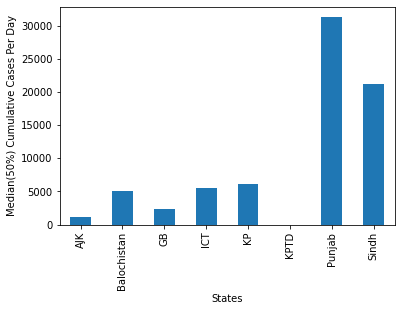

In [174]:
median = states_cumulative_summarykdf.loc['50%'].plot.bar()
median.axes.set_xlabel('States')
median.axes.set_ylabel('Median(50%) Cumulative Cases Per Day')